In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('pdxDevJobs.csv')

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
pd.set_option('display.max_columns', 29)

In [6]:
df.head(20)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,average_salary,company_fullname,in_PDX,age,javascript_yn,react_yn,node_yn,mongodb_yn,heroku_yn,webpack_yn
0,Software Developer,$52K-$94K (Glassdoor est.),We're looking for a Software Developer to join...,3.6,Suvoda\r\n3.6,"Portland, OR","Conshohocken, PA",201 to 500 employees,2012,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,52,94,73.0,Suvoda\r\n,True,8,False,False,False,False,False,False
1,Software Developer,$52K-$94K (Glassdoor est.),Cinder is looking for a *Software Engineer* to...,3.4,Cinder Staffing\r\n3.4,"Hillsboro, OR","Beaverton, OR",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Less than $1 million (USD),-1,52,94,73.0,Cinder Staffing\r\n,False,-1,False,False,False,False,False,False
2,App Developer,$52K-$94K (Glassdoor est.),Essential Functions:\r\n\r\n§ Responsible for ...,3.9,Regional Multiple Listing Service\r\n3.9,"Portland, OR","Portland, OR",1 to 50 employees,-1,Company - Private,Internet,Information Technology,$1 to $5 million (USD),-1,52,94,73.0,Regional Multiple Listing Service\r\n,True,-1,False,False,False,False,False,False
3,Lead Software Engineer,$52K-$94K (Glassdoor est.),Why Smarsh?\r\nOur motto is ‘People First. Ins...,3.5,Smarsh\r\n3.5,"Portland, OR","Portland, OR",501 to 1000 employees,2001,Company - Private,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"Global Relay, NortonLifeLock",52,94,73.0,Smarsh\r\n,True,19,False,True,True,False,False,False
4,Software Engineer,$52K-$94K (Glassdoor est.),What will you contribute?\r\n\r\nThe Software ...,3.2,Finastra\r\n3.2,"Portland, OR","London, United Kingdom",10000+ employees,2017,Company - Private,Financial Transaction Processing,Finance,$2 to $5 billion (USD),-1,52,94,73.0,Finastra\r\n,True,3,False,False,False,False,False,False
5,Jr. C++ Software Engineer - ArcGIS Runtime SDK,$52K-$94K (Glassdoor est.),Overview\r\n\r\n\r\nDo you have a passion for ...,3.5,Esri\r\n3.5,"Portland, OR","Redlands, CA",1001 to 5000 employees,1969,Company - Private,Computer Hardware & Software,Information Technology,$1 to $2 billion (USD),Pitney Bowes,52,94,73.0,Esri\r\n,True,51,False,False,False,False,False,False
6,Frontend Software Engineer,$52K-$94K (Glassdoor est.),Your Opportunity\r\n\r\n\r\nThe Developer Expe...,4.5,New Relic\r\n4.5,"Portland, OR","San Francisco, CA",1001 to 5000 employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"AppDynamics, Datadog, Dynatrace",52,94,73.0,New Relic\r\n,True,12,False,True,True,False,False,False
7,Software Engineer,$52K-$94K (Glassdoor est.),Software Engineer - Kafka Platform Team\r\nYou...,4.5,New Relic\r\n4.5,"Portland, OR","San Francisco, CA",1001 to 5000 employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"AppDynamics, Datadog, Dynatrace",52,94,73.0,New Relic\r\n,True,12,False,False,False,False,False,False
8,Software Engineer,$52K-$94K (Glassdoor est.),Primary Function\r\n\r\n\r\nWe are seeking an ...,3.7,TeamPeople\r\n3.7,"Hillsboro, OR","Falls Church, VA",501 to 1000 employees,2004,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD),"Aquent, Creative Circle, Maslow Media Group",52,94,73.0,TeamPeople\r\n,False,16,False,False,False,False,False,False
9,iOS/Android Runtime SDK Software Engineer,$52K-$94K (Glassdoor est.),Overview\r\n\r\n\r\nIf you have a passion for ...,3.5,Esri\r\n3.5,"Portland, OR","Redlands, CA",1001 to 5000 employees,1969,Company - Private,Computer Hardware & Software,Information Technology,$1 to $2 billion (USD),Pitney Bowes,52,94,73.0,Esri\r\n,True,51,False,False,False,False,False,False


In [7]:
def title_simplifier(title):
    if 'software engineer' in title.lower():
        return 'software engineer'
    elif 'software developer' in title.lower():
        return 'software developer'
    elif 'web developer' in title.lower():
        return 'web developer'
    elif 'UX' in title.lower():
        return 'UX'
    elif 'frontend' in title.lower() or 'front-end' in title.lower():
        return 'frontend'
    elif 'backend' in title.lower() or 'back-end' in title.lower():
        return 'backend'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower() or 'entry' in title.lower():
        return 'jr'
    else:
        return 'na'

In [8]:
df['simplified_title'] = df['Job Title'].apply(title_simplifier)

In [9]:
df.simplified_title.value_counts()

software engineer     144
na                     89
software developer     21
web developer           6
frontend                3
backend                 2
Name: simplified_title, dtype: int64

In [10]:
df['seniority'] = df['Job Title'].apply(seniority)

In [11]:
df.seniority.value_counts()

na        160
senior    103
jr          2
Name: seniority, dtype: int64

In [12]:
df['description_length'] = df['Job Description'].apply(lambda x: len(x))

In [13]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,average_salary,company_fullname,in_PDX,age,javascript_yn,react_yn,node_yn,mongodb_yn,heroku_yn,webpack_yn,simplified_title,seniority,description_length
0,Software Developer,$52K-$94K (Glassdoor est.),We're looking for a Software Developer to join...,3.6,Suvoda\r\n3.6,"Portland, OR","Conshohocken, PA",201 to 500 employees,2012,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,52,94,73.0,Suvoda\r\n,True,8,False,False,False,False,False,False,software developer,na,2856
1,Software Developer,$52K-$94K (Glassdoor est.),Cinder is looking for a *Software Engineer* to...,3.4,Cinder Staffing\r\n3.4,"Hillsboro, OR","Beaverton, OR",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Less than $1 million (USD),-1,52,94,73.0,Cinder Staffing\r\n,False,-1,False,False,False,False,False,False,software developer,na,1962
2,App Developer,$52K-$94K (Glassdoor est.),Essential Functions:\r\n\r\n§ Responsible for ...,3.9,Regional Multiple Listing Service\r\n3.9,"Portland, OR","Portland, OR",1 to 50 employees,-1,Company - Private,Internet,Information Technology,$1 to $5 million (USD),-1,52,94,73.0,Regional Multiple Listing Service\r\n,True,-1,False,False,False,False,False,False,na,na,1080
3,Lead Software Engineer,$52K-$94K (Glassdoor est.),Why Smarsh?\r\nOur motto is ‘People First. Ins...,3.5,Smarsh\r\n3.5,"Portland, OR","Portland, OR",501 to 1000 employees,2001,Company - Private,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"Global Relay, NortonLifeLock",52,94,73.0,Smarsh\r\n,True,19,False,True,True,False,False,False,software engineer,senior,4266
4,Software Engineer,$52K-$94K (Glassdoor est.),What will you contribute?\r\n\r\nThe Software ...,3.2,Finastra\r\n3.2,"Portland, OR","London, United Kingdom",10000+ employees,2017,Company - Private,Financial Transaction Processing,Finance,$2 to $5 billion (USD),-1,52,94,73.0,Finastra\r\n,True,3,False,False,False,False,False,False,software engineer,na,2341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Software Engineer,$72K-$125K (Glassdoor est.),Advantage Resourcing is seeking a Software Eng...,2.7,Advantage Resourcing\r\n2.7,"Hillsboro, OR","Cincinnati, OH",10000+ employees,1969,Company - Private,Staffing & Outsourcing,Business Services,$1 to $2 billion (USD),"Randstad US, Robert Half, Allegis Group",72,125,98.5,Advantage Resourcing\r\n,False,51,False,False,False,False,False,False,software engineer,na,3431
261,Automation Developer,$72K-$125K (Glassdoor est.),Cinder is looking for an *Automation Developer...,3.4,Cinder Staffing\r\n3.4,"Hillsboro, OR","Beaverton, OR",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Less than $1 million (USD),-1,72,125,98.5,Cinder Staffing\r\n,False,-1,False,False,False,False,False,False,na,na,2073
262,UI/UX Software Engineer,$72K-$125K (Glassdoor est.),Advantage Resourcing is seeking a UI/UX Softwa...,2.7,Advantage Resourcing\r\n2.7,"Hillsboro, OR","Cincinnati, OH",10000+ employees,1969,Company - Private,Staffing & Outsourcing,Business Services,$1 to $2 billion (USD),"Randstad US, Robert Half, Allegis Group",72,125,98.5,Advantage Resourcing\r\n,False,51,False,True,False,False,False,False,software engineer,na,2579
263,Senior Software Analyst - relocation required,$72K-$125K (Glassdoor est.),"The location for this position is in Richland,...",-1.0,Arch Staffing and Consulting,"Portland, OR","Grand Rapids, MI",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,72,125,98.5,Arch Staffing and Consulting,True,-1,False,False,False,False,False,False,na,senior,3632


In [14]:
df['comp_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [15]:
df.comp_count

0      0
1      0
2      0
3      2
4      0
      ..
260    3
261    0
262    3
263    0
264    2
Name: comp_count, Length: 265, dtype: int64

In [16]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplified_title', 'seniority',
       'description_length', 'comp_count'],
      dtype='object')

In [17]:
df['company_fullname'] = df.company_fullname.apply(lambda x: x.replace('\r', ''))

In [18]:
df.company_fullname

0                                 Suvoda\n
1                        Cinder Staffing\n
2      Regional Multiple Listing Service\n
3                                 Smarsh\n
4                               Finastra\n
                      ...                 
260                 Advantage Resourcing\n
261                      Cinder Staffing\n
262                 Advantage Resourcing\n
263           Arch Staffing and Consulting
264                            eBay Inc.\n
Name: company_fullname, Length: 265, dtype: object

In [19]:
df.describe()

,Rating,Founded,min_salary,max_salary,average_salary,age,description_length,comp_count
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,3.417358,1537.822642,69.660377,115.147170,92.403774,24.366038,3461.192453,0.939623
std,1.515601,834.667523,25.434812,29.046414,26.360467,34.172662,1652.677340,1.286636
min,-1.000000,-1.000000,36.000000,67.000000,51.500000,-1.000000,132.000000,0.000000
25%,3.300000,1887.000000,52.000000,98.000000,75.000000,4.000000,2299.000000,0.000000
50%,3.700000,1992.000000,66.000000,108.000000,87.000000,16.000000,3431.000000,0.000000
75%,4.200000,2006.000000,72.000000,126.000000,99.000000,28.000000,4508.000000,2.000000
max,5.000000,2018.000000,126.000000,169.000000,137.000000,222.000000,9464.000000,3.000000


<AxesSubplot:>

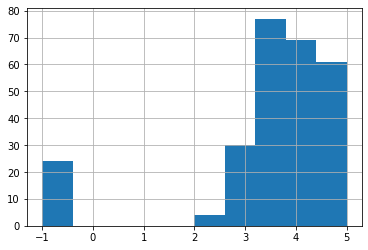

In [20]:
df.Rating.hist()

<AxesSubplot:>

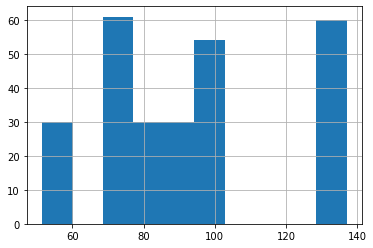

In [21]:
df.average_salary.hist()

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplified_title', 'seniority',
       'description_length', 'comp_count'],
      dtype='object')

<AxesSubplot:>

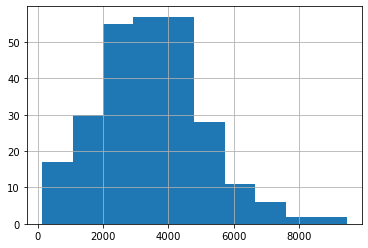

In [23]:
df.description_length.hist()

<AxesSubplot:>

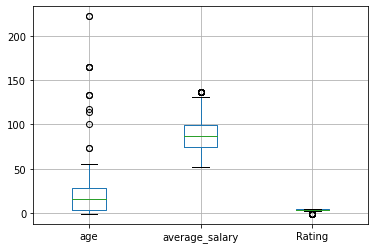

In [24]:
df.boxplot(column = ['age', 'average_salary', 'Rating'])

In [25]:
df[['Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplified_title',
       'seniority']].corr()

,Founded,in_PDX,age,javascript_yn,react_yn,node_yn,mongodb_yn,heroku_yn,webpack_yn
Founded,1.000000,-0.045131,0.367743,0.043171,0.071801,-0.011901,-0.000410,NaN,0.059193
in_PDX,-0.045131,1.000000,-0.218698,0.049092,0.097895,0.000161,0.104247,NaN,-0.062912
age,0.367743,-0.218698,1.000000,0.211558,0.070718,-0.009807,0.056625,NaN,-0.009514
javascript_yn,0.043171,0.049092,0.211558,1.000000,0.402006,0.333756,0.210816,NaN,0.173540
react_yn,0.071801,0.097895,0.070718,0.402006,1.000000,0.286247,0.137579,NaN,0.022957
node_yn,-0.011901,0.000161,-0.009807,0.333756,0.286247,1.000000,0.146814,NaN,0.148899
mongodb_yn,-0.000410,0.104247,0.056625,0.210816,0.137579,0.146814,1.000000,NaN,-0.020064
heroku_yn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
webpack_yn,0.059193,-0.062912,-0.009514,0.173540,0.022957,0.148899,-0.020064,NaN,1.000000


<AxesSubplot:>

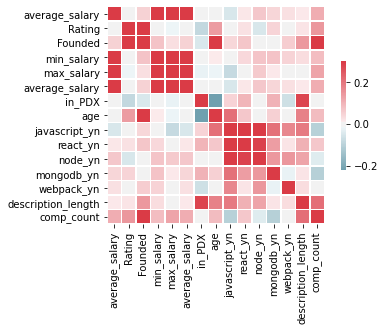

In [38]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['average_salary','Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn', 'webpack_yn', 'simplified_title', 'seniority',
       'description_length', 'comp_count']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplified_title', 'seniority',
       'description_length', 'comp_count'],
      dtype='object')

In [28]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplified_title',
       'seniority']]

graph for Location: total = 10


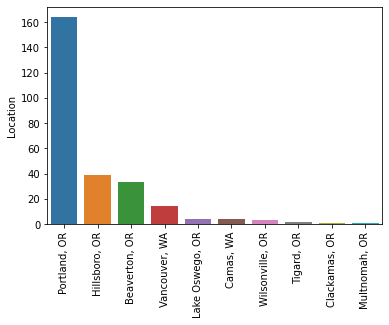

graph for Headquarters: total = 80


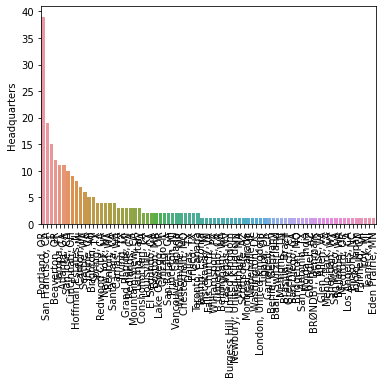

graph for Size: total = 9


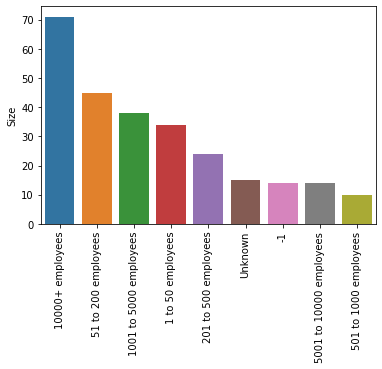

graph for Founded: total = 50


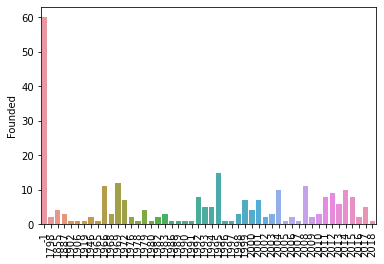

graph for Type of ownership: total = 8


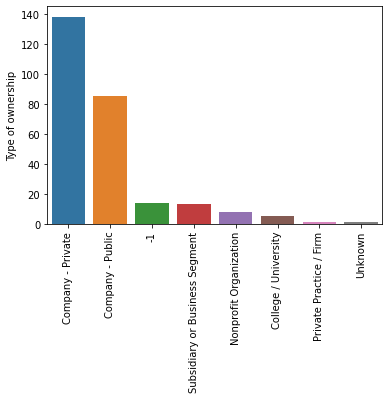

graph for Industry: total = 31


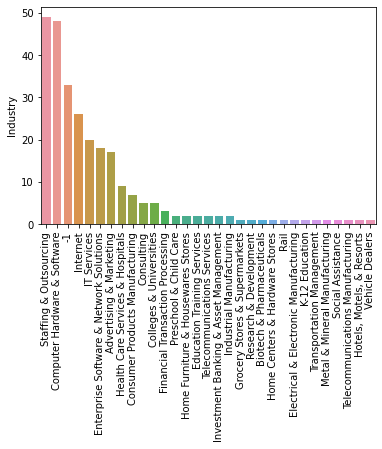

graph for Sector: total = 13


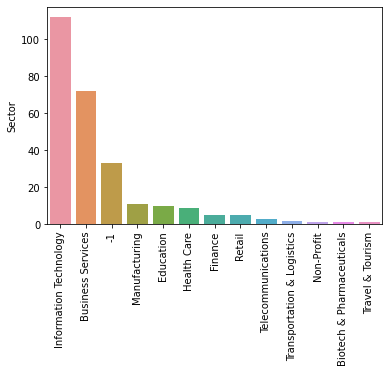

graph for Revenue: total = 14


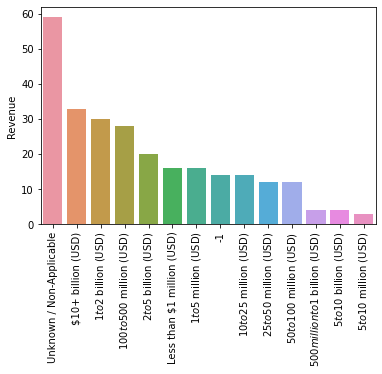

graph for company_fullname: total = 142


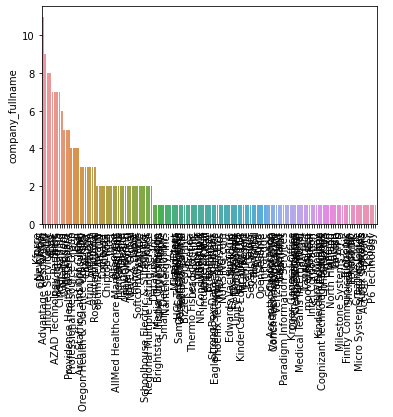

graph for in_PDX: total = 2


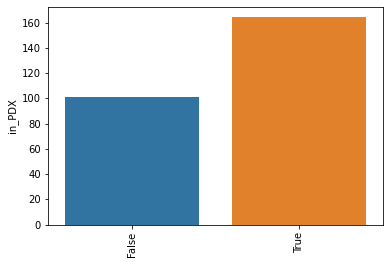

graph for age: total = 50


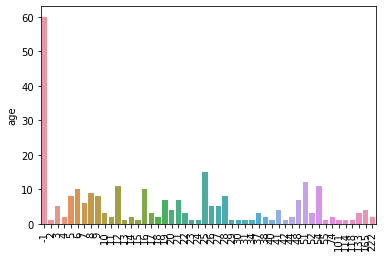

graph for javascript_yn: total = 2


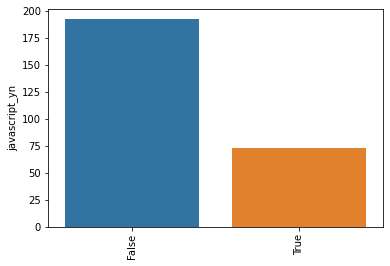

graph for react_yn: total = 2


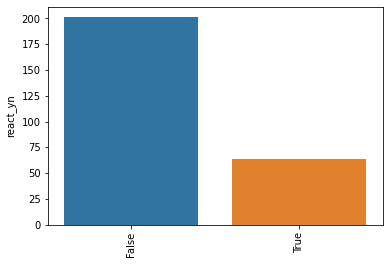

graph for node_yn: total = 2


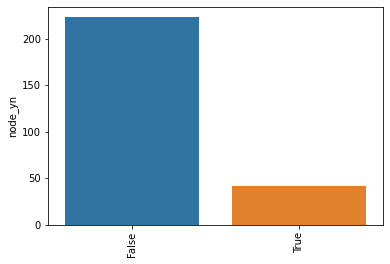

graph for mongodb_yn: total = 2


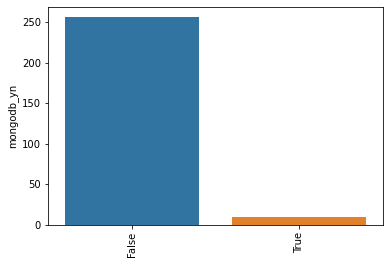

graph for heroku_yn: total = 1


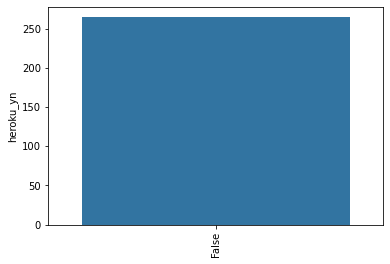

graph for webpack_yn: total = 2


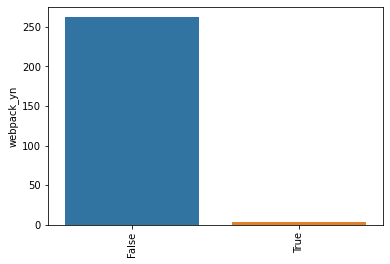

graph for simplified_title: total = 6


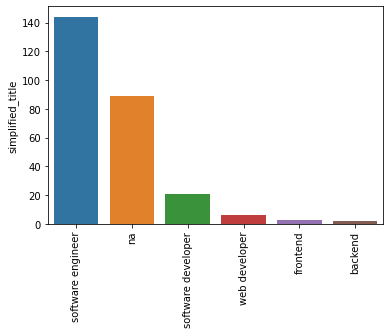

graph for seniority: total = 3


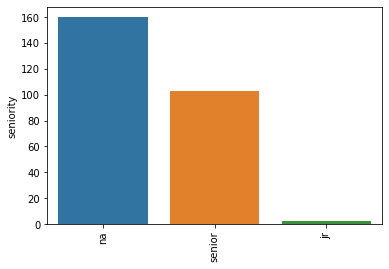

In [29]:
for i in df_cat.columns: 
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Headquarters: total = 25


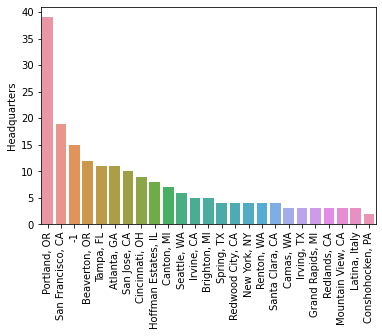

graph for company_fullname: total = 25


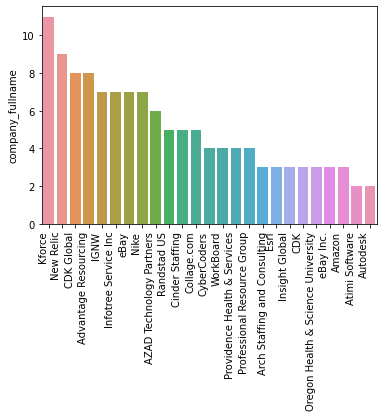

In [30]:
for i in df_cat[['Headquarters', 'company_fullname']].columns: 
    cat_num = df_cat[i].value_counts()[:25]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplified_title', 'seniority',
       'description_length', 'comp_count'],
      dtype='object')

In [32]:
pd.pivot_table(df, index = ['simplified_title', 'seniority'], values = 'average_salary')

average_salary
simplified_title   seniority                
backend            na              78.000000
frontend           na              75.666667
na                 na              95.439394
                   senior          91.717391
software developer jr              73.000000
                   na              74.676471
                   senior         116.500000
software engineer  jr              73.000000
                   na              91.954545
                   senior          96.324675
web developer      na              74.083333

In [33]:
pd.pivot_table(df, index = ['in_PDX', 'simplified_title'], values = 'average_salary')

average_salary
in_PDX simplified_title                  
False  backend                  78.000000
       na                       99.823529
       software developer       78.500000
       software engineer        93.663265
       web developer            62.250000
True   frontend                 75.666667
       na                       91.172727
       software developer       84.714286
       software engineer        94.415789
       web developer            80.000000

In [34]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplified_title', 'seniority',
       'description_length', 'comp_count'],
      dtype='object')

In [35]:
df_piv = df[['Rating', 'Size', 'Revenue', 'comp_count', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'Industry','Type of ownership','average_salary']]

In [36]:
for i in df_piv.columns: 
    print(i)
    print(pd.pivot_table(df_piv, index=i, values='average_salary').sort_values('average_salary', ascending=False))

Rating
        average_salary
Rating                
 4.7        109.400000
 4.8        109.000000
 4.4        102.750000
 3.3        100.187500
 3.6         99.684211
 2.5         99.000000
 4.9         98.125000
 3.9         97.210526
 4.1         96.500000
 3.7         95.647059
-1.0         95.208333
 5.0         95.000000
 4.6         94.700000
 3.8         92.833333
 2.7         92.650000
 3.1         87.566667
 3.4         87.117647
 2.1         87.000000
 4.0         86.111111
 3.5         84.807692
 3.2         84.333333
 4.5         82.976190
 4.2         76.833333
 2.8         75.250000
 4.3         69.166667
 2.9         51.500000
Size
                         average_salary
Size                                   
5001 to 10000 employees       96.250000
501 to 1000 employees         95.100000
10000+ employees              95.028169
201 to 500 employees          94.687500
51 to 200 employees           93.788889
-1                            93.607143
1001 to 5000 employees  

ValueError: Grouper for 'average_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_piv, index='Industry', columns='react_yn', values = 'average_salary', aggfunc= 'count')

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 100, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.to_csv('PDXDevJobsEDA.csv')